In [4]:
#Analyse Exploratoire

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("full_data_flightdelay.csv")

#On prend 100 000 lignes
df_sample = df.sample(n=100000, random_state=42)
df_sample.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
984735,3,5,0,1500-1559,3,4,27,69,"Midwest Airline, Inc.",11965,...,11,Ronald Reagan Washington National,38.852,-77.037,Eppley Airfield,0.00,0.0,0.0,68.0,4.47
4740332,9,7,0,2200-2259,5,1,7,128,American Airlines Inc.,6740,...,6,Miami International,25.792,-80.286,NONE,0.00,0.0,0.0,94.0,5.82
6361351,12,1,0,1900-1959,3,5,15,76,Endeavor Air Inc.,5359,...,5,Raleigh-Durham International,35.875,-78.782,Tampa International,0.00,0.0,0.0,50.0,7.83
4012189,8,3,0,1700-1759,6,2,22,276,United Air Lines Inc.,11012,...,17,Newark Liberty International,40.696,-74.172,San Francisco International,1.69,0.0,0.0,84.0,4.25
4789024,9,5,0,0800-0859,2,1,3,76,Mesa Airlines Inc.,1378,...,2,Tulsa International,36.198,-95.890,NONE,0.00,0.0,0.0,95.0,6.26


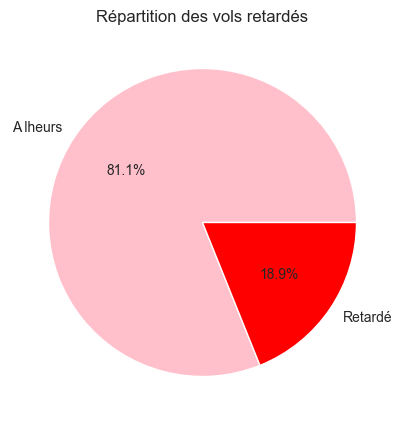

In [23]:
#Répartition des vols en retard par heure

plt.figure(figsize=(5,5))
df['DEP_DEL15'].value_counts().plot.pie(autopct='%1.1f%%', labels=['A lheurs', 'Retardé'], colors=['pink', 'red'])
plt.title('Répartition des vols retardés')
plt.ylabel('')
plt.show()

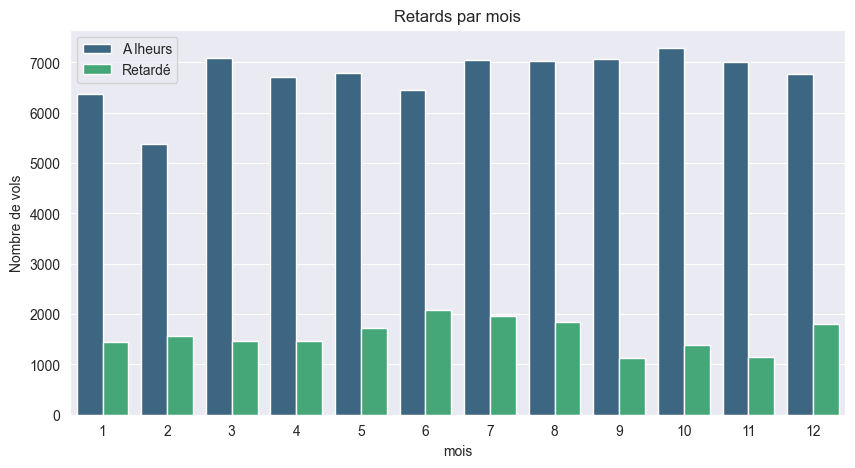

In [36]:
#Rétard par mois

plt.figure(figsize=(10,5))
sns.countplot(data=df_sample, x='MONTH', hue='DEP_DEL15', palette='viridis')

plt.title('Retards par mois')
plt.xlabel('mois')
plt.ylabel('Nombre de vols')
plt.legend(['A lheurs','Retardé'])
plt.show()

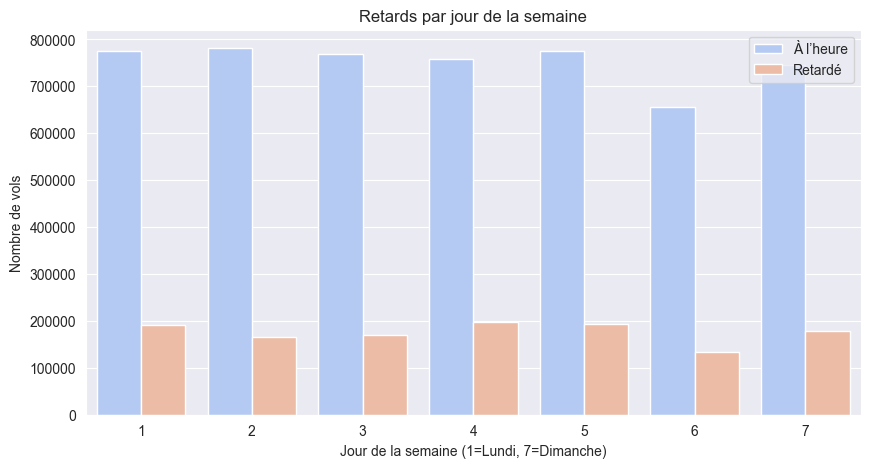

In [35]:
#Retards de vol par jours de la semaine

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='DAY_OF_WEEK', hue='DEP_DEL15', palette='coolwarm')
plt.title('Retards par jour de la semaine')
plt.xlabel('Jour de la semaine (1=Lundi, 7=Dimanche)')
plt.ylabel('Nombre de vols')
plt.legend(['À l’heure', 'Retardé'])
plt.show()

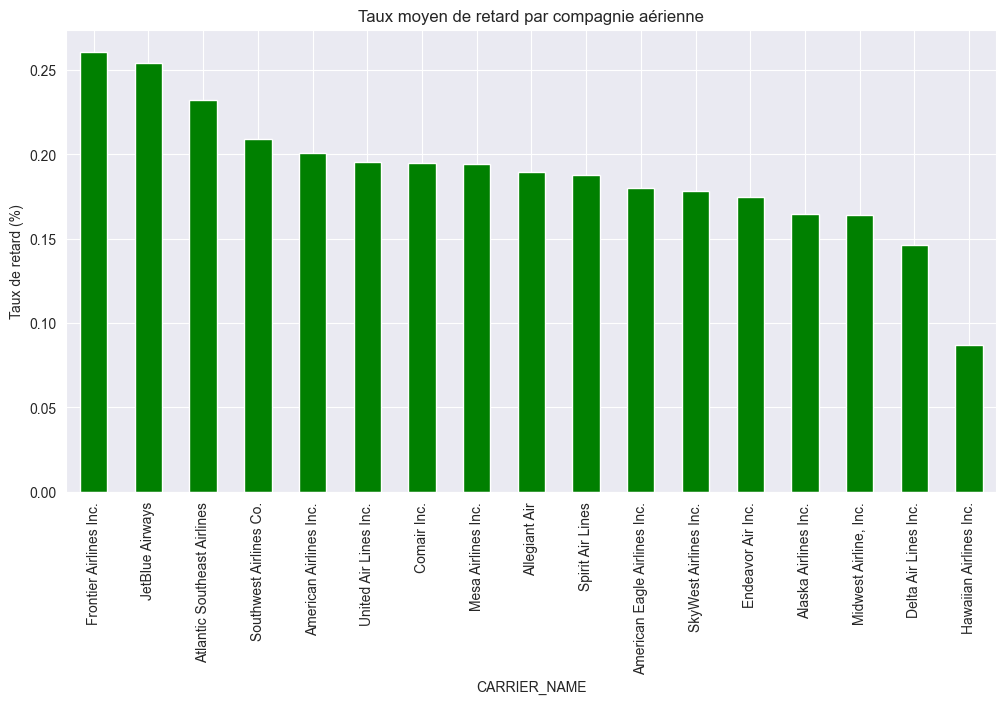

In [37]:
#Retards par compagnie aérienne

plt.figure(figsize=(12,6))
df.groupby('CARRIER_NAME')['DEP_DEL15'].mean().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Taux moyen de retard par compagnie aérienne')
plt.ylabel('Taux de retard (%)')
plt.show()